In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

# Data

In [5]:
# Read data
motion_04 = np.genfromtxt('../dataset2/motion_04.csv', delimiter=',')
print("Motion 0.4 data has a length of ", len(motion_04))

Motion 0.4 data has a length of  121152


## Visualizations

In [6]:
"""
    Plot a 4x2 grid of comparing data.
"""
def plot_non_overlapping_data(dataset, data:list, idxs: list):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(20,15))
    fig.suptitle('Heigh-Force (Idle)')

    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Height (FR)')

    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Force (FR)')

    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Height (FL)')

    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Force (FL)')

    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Height (RR)')

    ax6.plot(dataset[data[2], 0], datasetD[data[2], idxs[5]], 'g-')
    ax6.set_xlabel('Time')
    ax6.set_ylabel('Force (RR)')

    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_xlabel('Time')
    ax7.set_ylabel('Height (RL)')

    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_xlabel('Time')
    ax8.set_ylabel('Force (RL)')

    fig.tight_layout()

    plt.show()
 
"""
    Plot data on overlapping graph. 
"""
def plot_overlapping_data(title: str, dataset, data: list, idxs: list, draw_footsteps=None, footsteps_timestamp=None):
    fig, (ax1, ax3, ax5, ax7) = plt.subplots(4,1, figsize=(20,15))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_ylabel('Height (FR)')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_ylabel('Force (FR)', color='g')
          
    # FL plot (height)
    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_ylabel('Height (FL)')
    ax3.set_xlabel('Time')
         
    # FL plot (force)
    ax4 = ax3.twinx()
    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_ylabel('Force(FL)', color='g')      
          
    # RR plot (height)
    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_ylabel('Height (RR)')
    ax5.set_xlabel('Time')
         
    # RR plot (force)
    ax6 = ax5.twinx()
    ax6.plot(dataset[data[2], 0], dataset[data[2], idxs[5]], 'g-')
    ax6.set_ylabel('Force (RR)', color='g')   
          
    # RL plot (height)
    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_ylabel('Height (RL)')
    ax7.set_xlabel('Time')
         
    # RL plot (force)
    ax8 = ax7.twinx()
    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_ylabel('Force (RL)', color='g')

    for ax in [ax2, ax4, ax6, ax8]:
        for tl in ax.get_yticklabels():
            tl.set_color('g')
    
    # Draw footsteps
    if draw_footsteps:
        for ax in [ax1, ax3, ax5, ax7]:
            for footstep_timestamp in footsteps_timestamp:
                if footstep_timestamp <= max(dataset[data[0], 0]) and footstep_timestamp >= min(dataset[data[0], 0]):
                    #print("Timestamp: ", footstep_timestamp)
                    ax.axvline(x=footstep_timestamp, color='r', linestyle='-')
                    ax.axvline(x=footstep_timestamp+100, color='b', linestyle='-')
                    print(footstep_timestamp, footstep_timestamp+100)
    
    fig.tight_layout()
    plt.show()

## Height-Force plots

In [7]:
"""
def get_specific_cmd(dataset, fwd, side, rot):
    return np.where(np.logical_and(dataset[:, 2] == fwd, 
                                   dataset[:, 3] == side, 
                                   dataset[:, 4] == rot))[0]
"""

def get_specific_cmd(dataset, fwd, side, rot):
    idxs = []
    for row_id, item in enumerate(dataset):
        if np.isclose(item[2], fwd, 0.01) and np.isclose(item[3], side, 0.01) and np.isclose(item[4], rot, 0.01):
            idxs.append(row_id)
    
    return idxs

In [8]:
def get_swinging_motions(dataset, height=-0.3):
    # FR min height (i.e swining motion)
    fr_min_height = np.where(dataset[:, 34] < height)[0]
    fl_min_height = np.where(dataset[:, 37] < height)[0]
    rr_min_height = np.where(dataset[:, 40] < height)[0]
    rl_min_height = np.where(dataset[:, 43] < height)[0]
            
    return fr_min_height,fl_min_height,rr_min_height,rl_min_height

## Motion_04

In [9]:
velocity = 0.409412

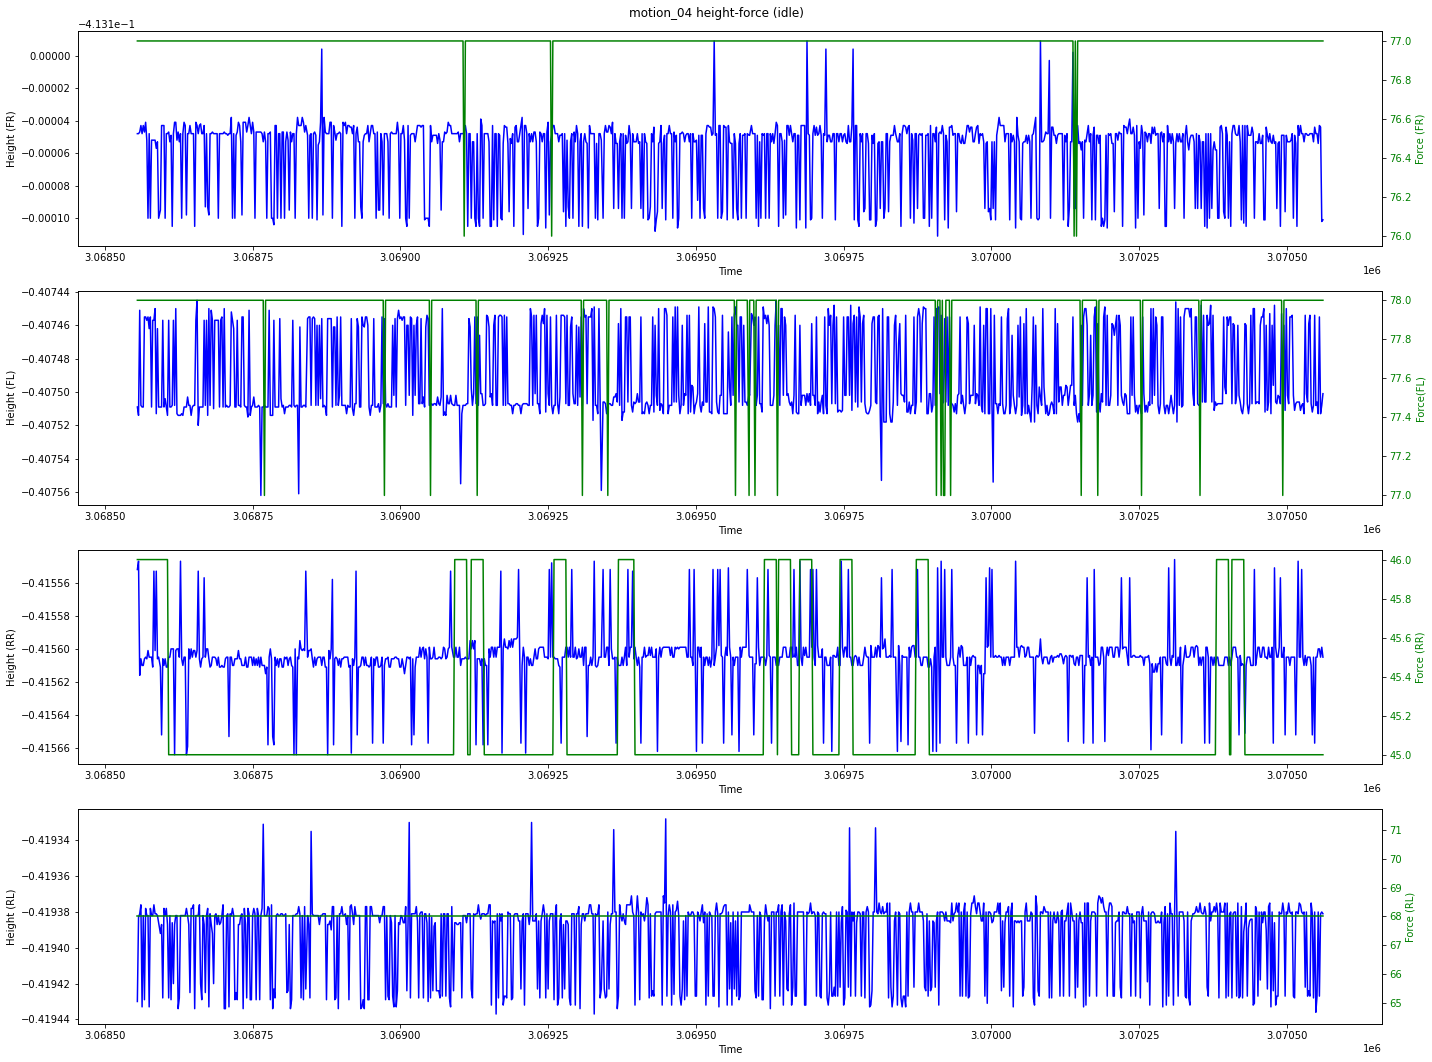

In [10]:
# Idle
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_04)

sample_walking_fr_height = fr_min_height[:1000]
sample_walking_fl_height = fl_min_height[:1000]
sample_walking_rr_height = rr_min_height[:1000]
sample_walking_rl_height = rl_min_height[:1000]

plot_overlapping_data("motion_04 height-force (idle)",
                      motion_04,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

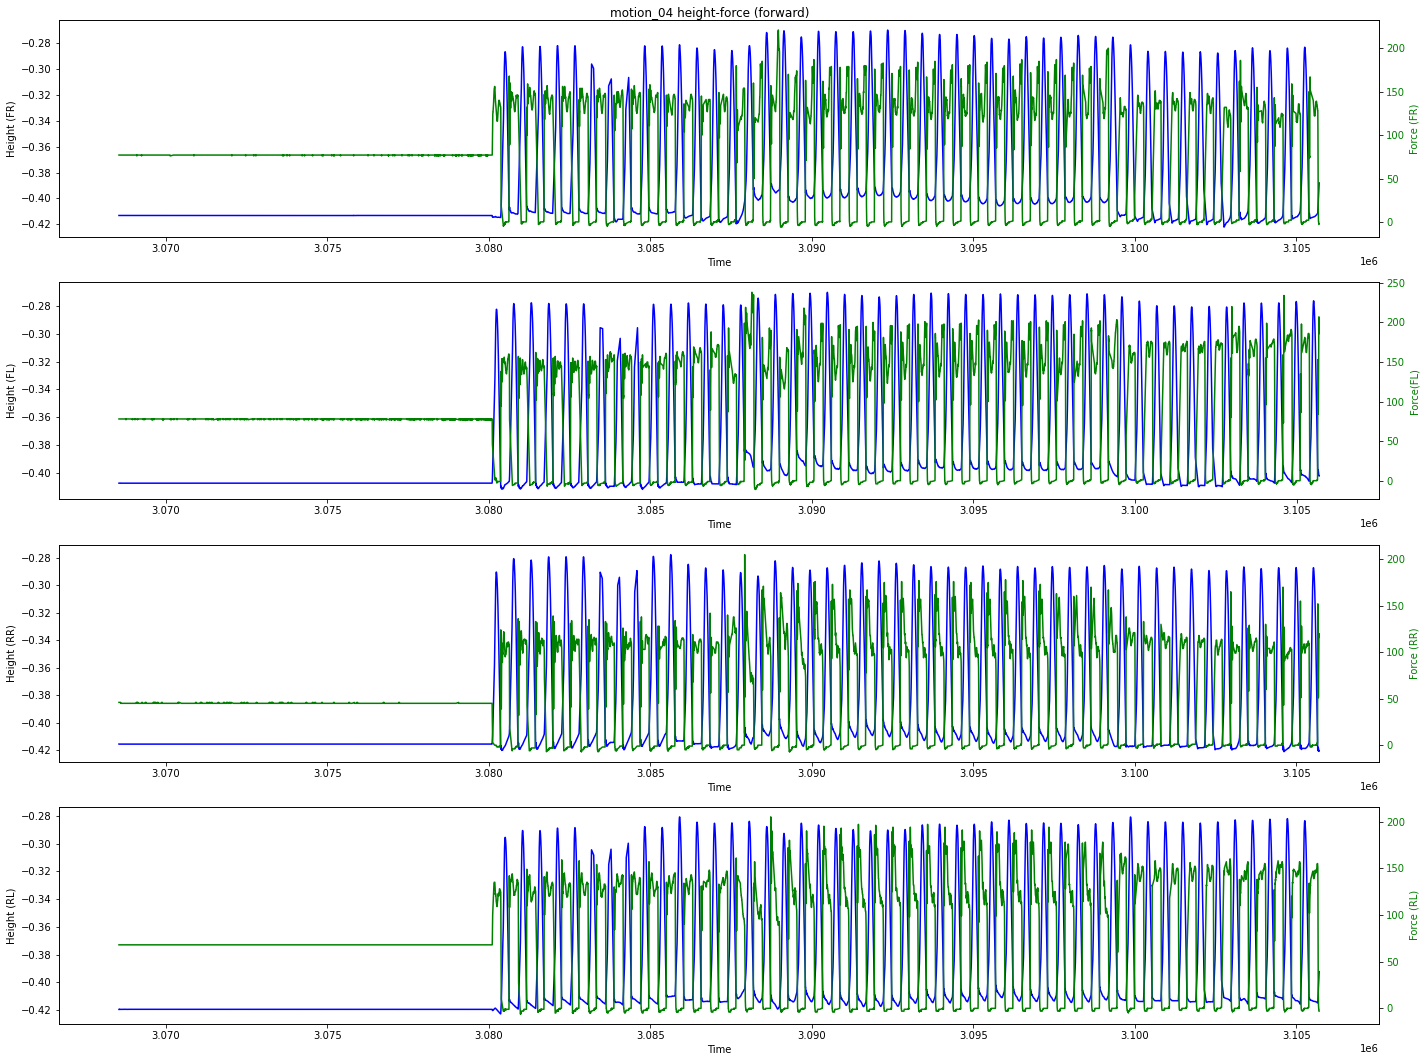

In [11]:
# Forward
fwd_cmds = get_specific_cmd(motion_04, velocity, 0, 0)
motion_04_fwd = motion_04[fwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_04_fwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_04 height-force (forward)",
                      motion_04,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

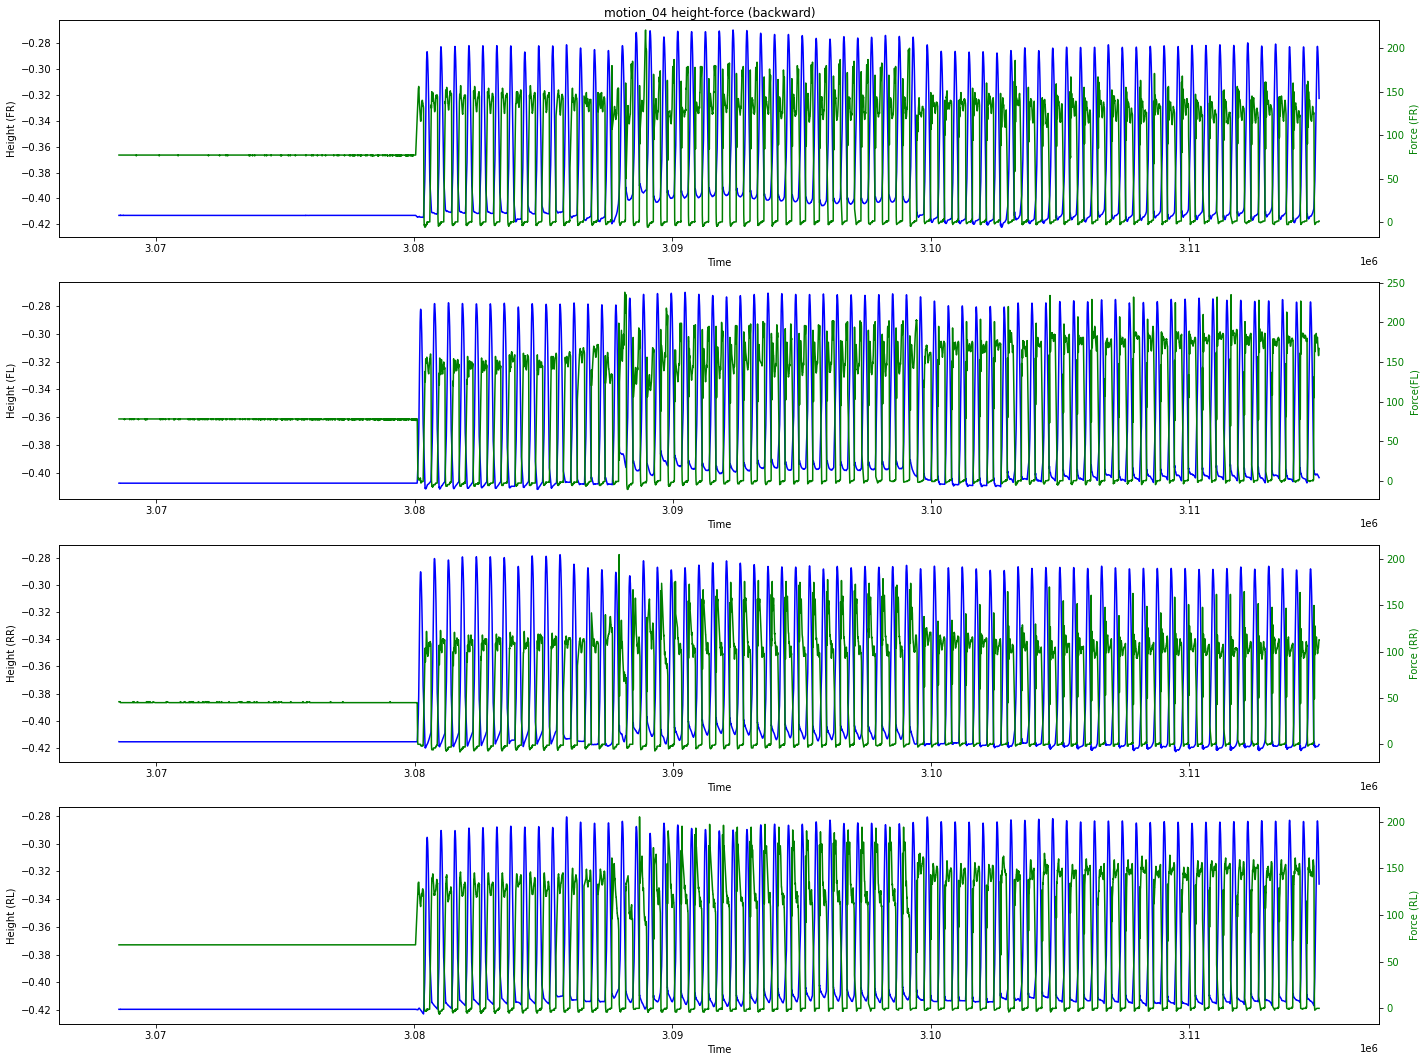

In [12]:
# Backwards
bwd_cmds = get_specific_cmd(motion_04, -velocity, 0, 0)
motion_04_bwd = motion_04[bwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_04_bwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_04 height-force (backward)",
                      motion_04,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

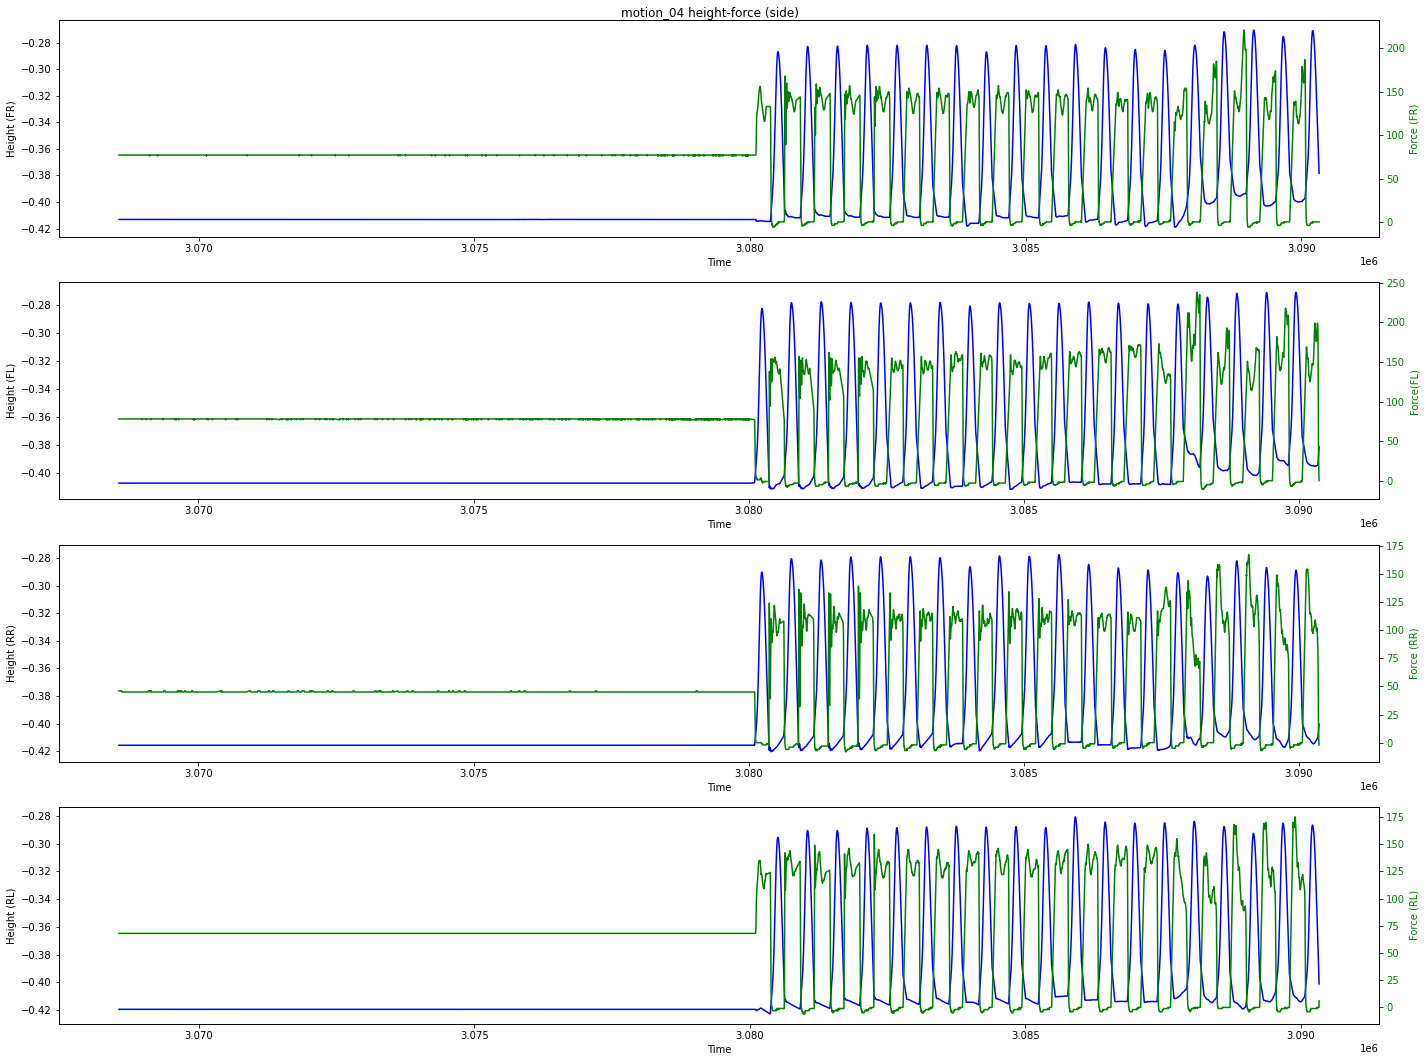

In [13]:
# Side (right)
side_cmds = get_specific_cmd(motion_04, 0, velocity, 0)
motion_04_side = motion_04[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_04_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_04 height-force (side)",
                      motion_04,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

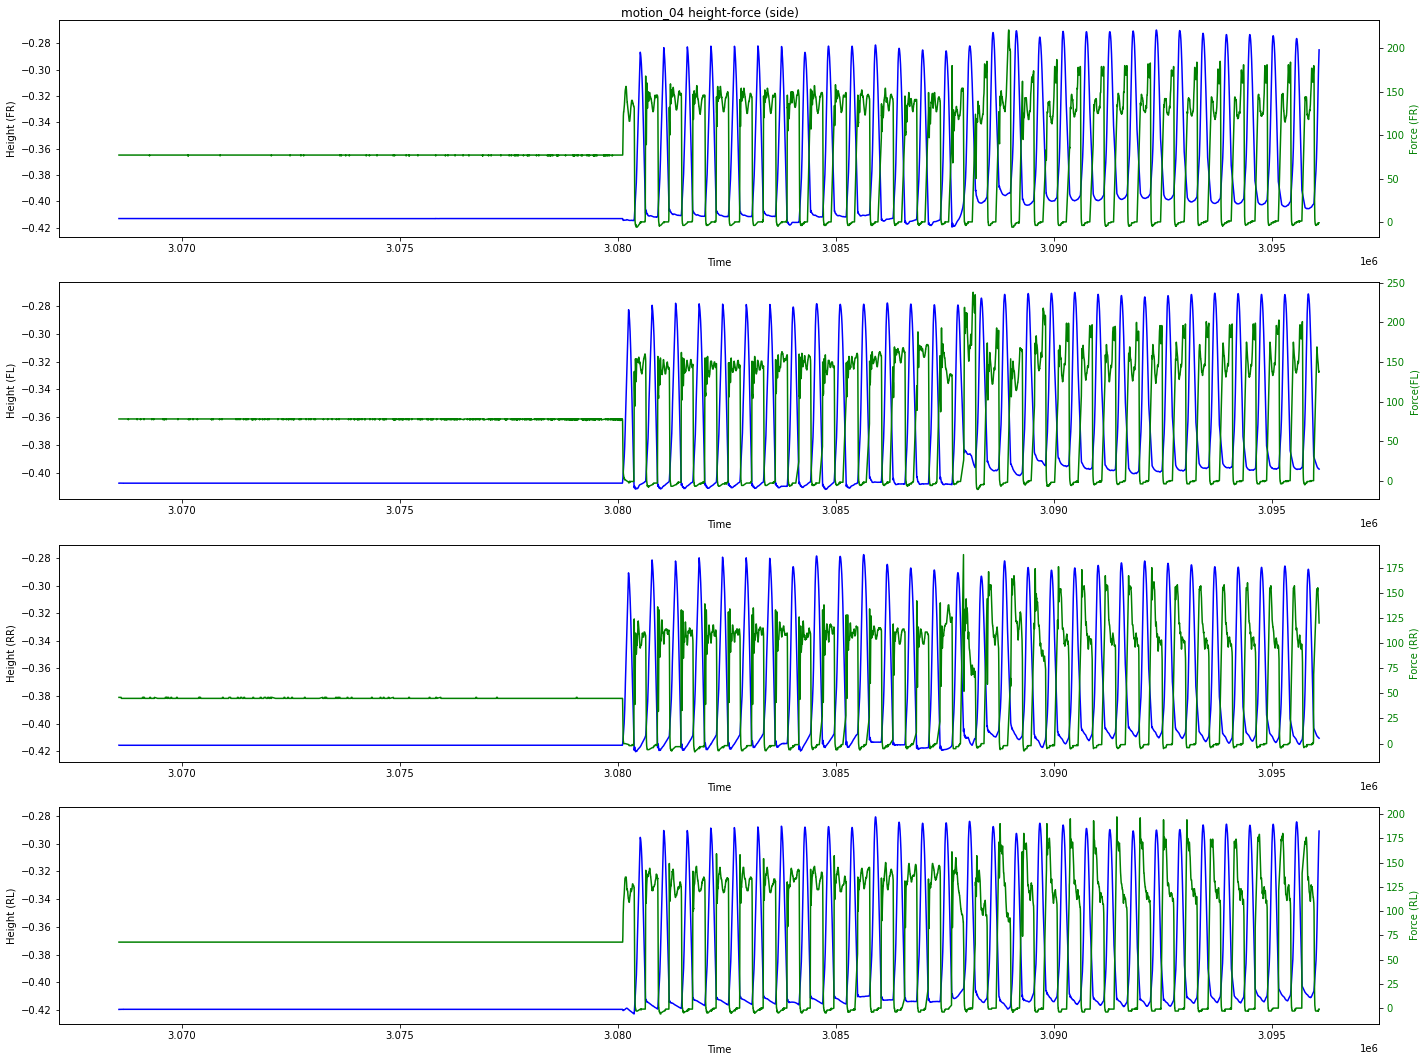

In [14]:
# Side (left)
side_cmds = get_specific_cmd(motion_04, 0, -velocity, 0)
motion_04_side = motion_04[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_04_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_04 height-force (side)",
                      motion_04,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

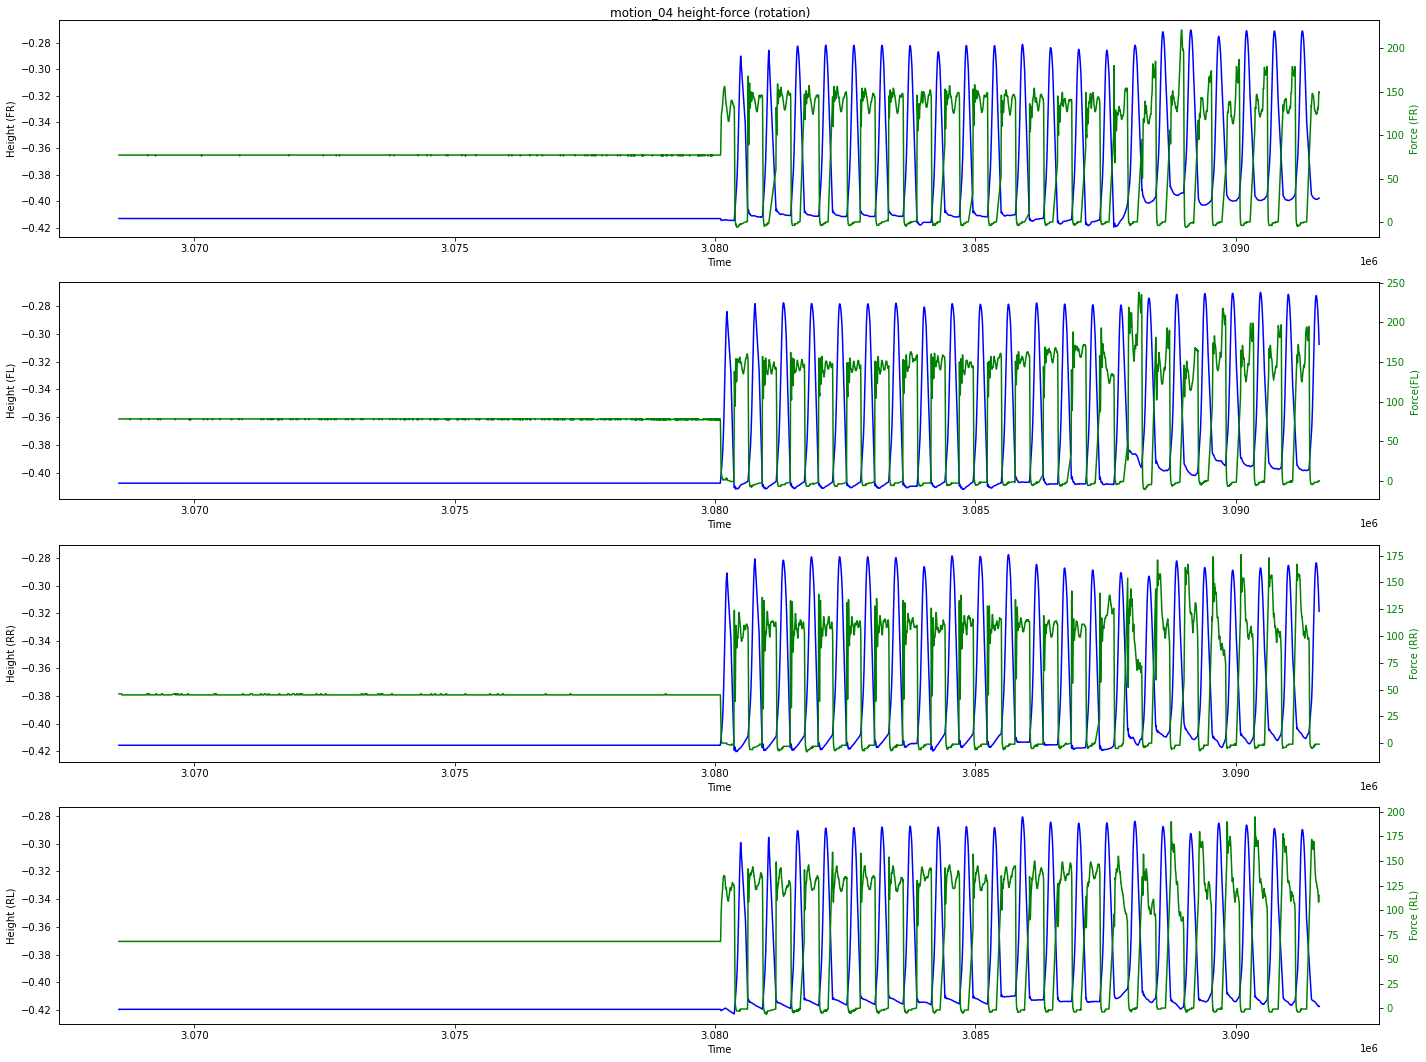

In [15]:
# Rotation (clockwise)
rot_cmds = get_specific_cmd(motion_04, 0, 0, velocity)
motion_04_rot = motion_04[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_04_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_04 height-force (rotation)",
                      motion_04,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

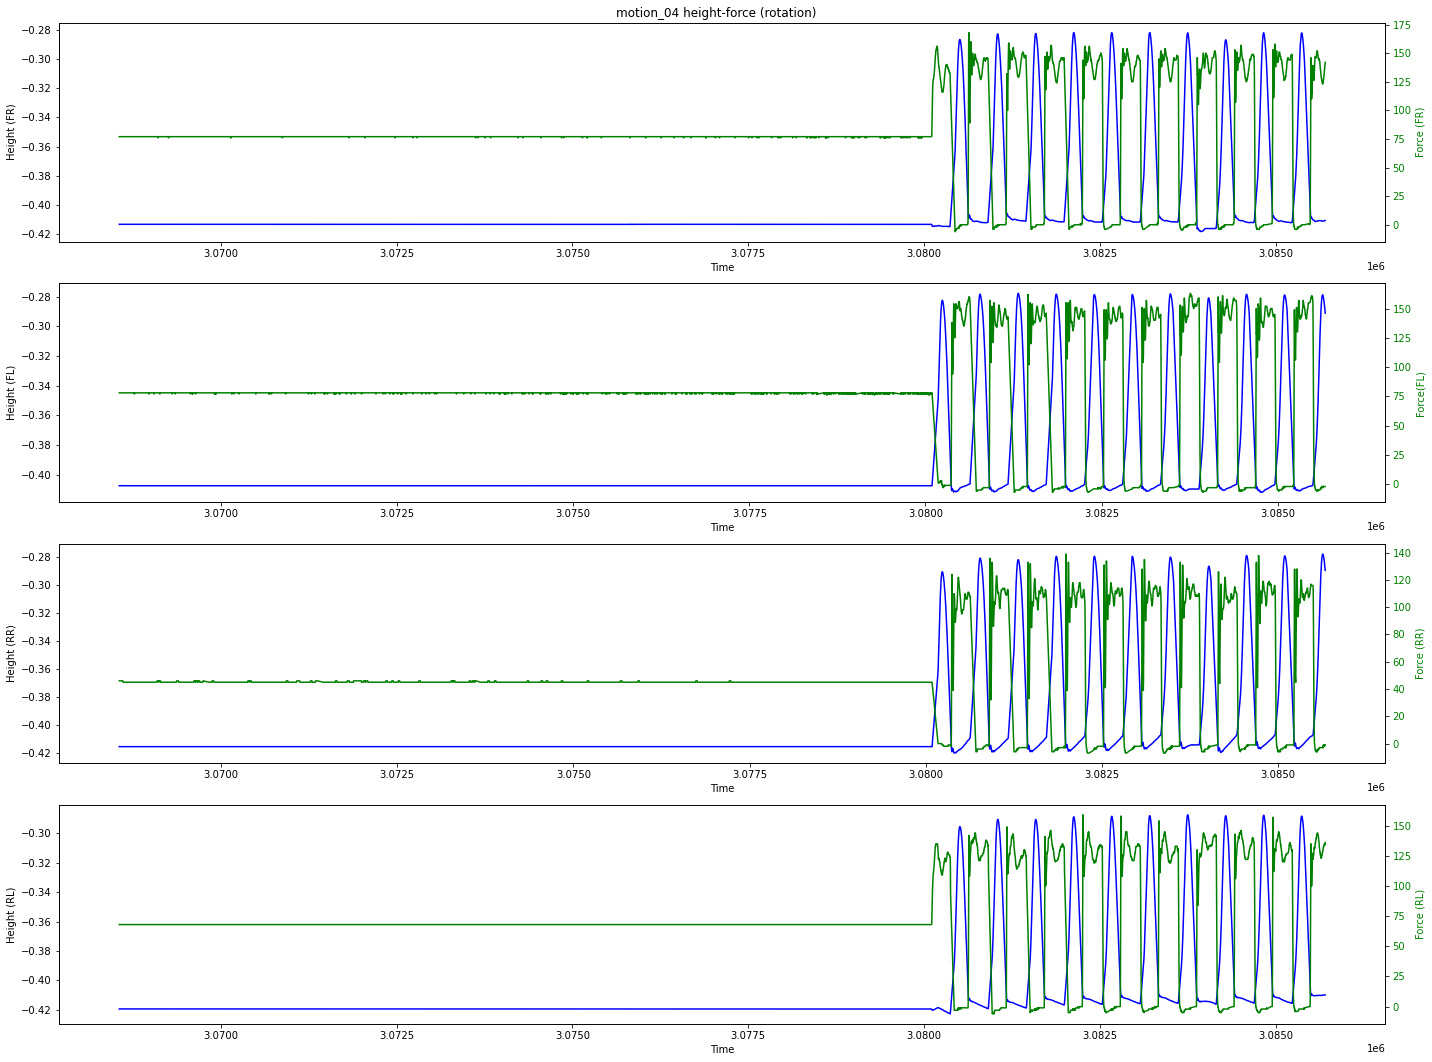

In [16]:
# Rotation (counter clockwise)
rot_cmds = get_specific_cmd(motion_04, 0, 0, -velocity)
motion_04_rot = motion_04[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_04_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_04 height-force (rotation)",
                      motion_04,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

## Footsteps Extraction (Height + Force)

In [17]:
def extract_footsteps(dataset, height_threshold=0.1, force_thresholds=[100,100,100,100]):
    # Compute height difference for FR and FL
    fr_fl_diff = np.round(abs(dataset[:, 34] - dataset[:, 37]), 9)

    # Compute height difference for RR and RL
    rr_rl_diff = np.round(abs(dataset[:, 40] - dataset[:, 43]), 9)

    # Compute compound difference for all foots
    height_diff = np.round(fr_fl_diff + rr_rl_diff, 9)
    print("Min and max diff between front and rear feet", min(height_diff), max(height_diff), "\n")
    
    # Find footsteps (based on height difference)
    footsteps_height = np.where(height_diff < height_threshold)[0]
    print("Amount of footsteps found with height criteria: ", len(footsteps_height), "\n")
    
    # Footsteps that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with motion commands: ", footsteps_due_to_motion, "\n")
    
    # Footsteps that belong to idle mode
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with no motion commands: ", footsteps_due_to_stationarity, "\n")
    
    # FR min height (i.e swining motion)
    rear_force_footsteps = np.where(np.logical_and(dataset[:, 58] > force_thresholds[0], 
                                                   dataset[:, 59] > force_thresholds[1]))[0]
    front_force_footsteps = np.where(np.logical_and(dataset[:, 56] > force_thresholds[2], 
                                                    dataset[:, 57] > force_thresholds[3]))[0]

    # Find footsteps that match force constraints on all foot
    footsteps_force = np.intersect1d(rear_force_footsteps, front_force_footsteps)
    print("Number of force footsteps: ", len(footsteps_force), "\n")
    
    # Find force and height footsteps intersection
    force_height_footsteps = np.intersect1d(footsteps_force, footsteps_height)
    print("Number of height-force footsteps: ", len(force_height_footsteps), "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to motion: ", footsteps_due_to_motion, "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to no motion: ", footsteps_due_to_stationarity, "\n")
    
    return force_height_footsteps

def footsteps_nms(dataset, footsteps):
    footsteps_nms = []

    footsteps_sort, timestamps_sort = zip(*sorted(zip(footsteps, dataset[footsteps, 0])))

    for idx, footstep_sort in enumerate(footsteps_sort):
        if idx > 0:
            if abs(dataset[footstep_sort, 0] - dataset[footsteps_sort[idx-1], 0]) < 9:
                continue
            else:
                footsteps_nms.append(footstep_sort)
        else:
            footsteps_nms.append(footstep_sort)

    return np.asarray(footsteps_nms)

## Footsteps

In [18]:
def footstep_extraction_and_plotting(dataset, velocities, height_threshold, force_thresholds, indexes):
    # Extract backward motion entries
    cmds = get_specific_cmd(dataset, velocities[0], velocities[1], velocities[2])
    motion_04_cmds = motion_04[cmds]
    fr_min_height, fl_min_height, rr_min_height, rl_min_height = get_swinging_motions(motion_04_cmds)
    print("Foot swinging motions lenghts: ", len(fr_min_height), len(fl_min_height), len(rr_min_height), len(rl_min_height))
    
    # Extract footsteps
    footsteps = extract_footsteps(motion_04_cmds, height_threshold, force_thresholds)
    print("Footsteps extracted: ", len(footsteps))
    
    # Footsteps NMS
    footsteps_after_nms = footsteps_nms(motion_04_cmds, footsteps)
    print("Footsteps after non-maximum-suppression: ", len(footsteps_after_nms))
    
    # Plot footsteps
    sample_walking_fr_height = fr_min_height[indexes]
    sample_walking_fl_height = fl_min_height[indexes]
    sample_walking_rr_height = rr_min_height[indexes]
    sample_walking_rl_height = rl_min_height[indexes]

    plot_overlapping_data("Footsteps",
                          motion_04_cmds,
                          [sample_walking_fr_height, 
                           sample_walking_fl_height, 
                           sample_walking_rr_height,
                           sample_walking_rl_height],
                           [34, 56, 37, 57, 40, 58, 43, 59],
                           True,
                           motion_04_cmds[footsteps_nms(motion_04_cmds, footsteps), 0])
    
    return motion_04_cmds, footsteps_after_nms

### Forward motion

Foot swinging motions lenghts:  15533 15524 16344 16404
Min and max diff between front and rear feet 0.00022 0.263934 

Amount of footsteps found with height criteria:  7654 

Intersection with motion commands:  7654 

Intersection with no motion commands:  0 

Number of force footsteps:  699 

Number of height-force footsteps:  699 

Number of footsteps extracted with height-force due to motion:  699 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  699
Footsteps after non-maximum-suppression:  139
3087658.0 3087758.0
3087917.0 3088017.0
3088194.0 3088294.0
3088463.0 3088563.0
3088728.0 3088828.0
3088999.0 3089099.0
3089270.0 3089370.0
3089531.0 3089631.0
3089804.0 3089904.0
3087658.0 3087758.0
3087917.0 3088017.0
3088194.0 3088294.0
3088463.0 3088563.0
3088728.0 3088828.0
3088999.0 3089099.0
3089270.0 3089370.0
3089531.0 3089631.0
3089804.0 3089904.0
3087658.0 3087758.0
3087917.0 3088017.0
3088194.0 3088294.0
3088463.0 3088563.0
3088728.0 

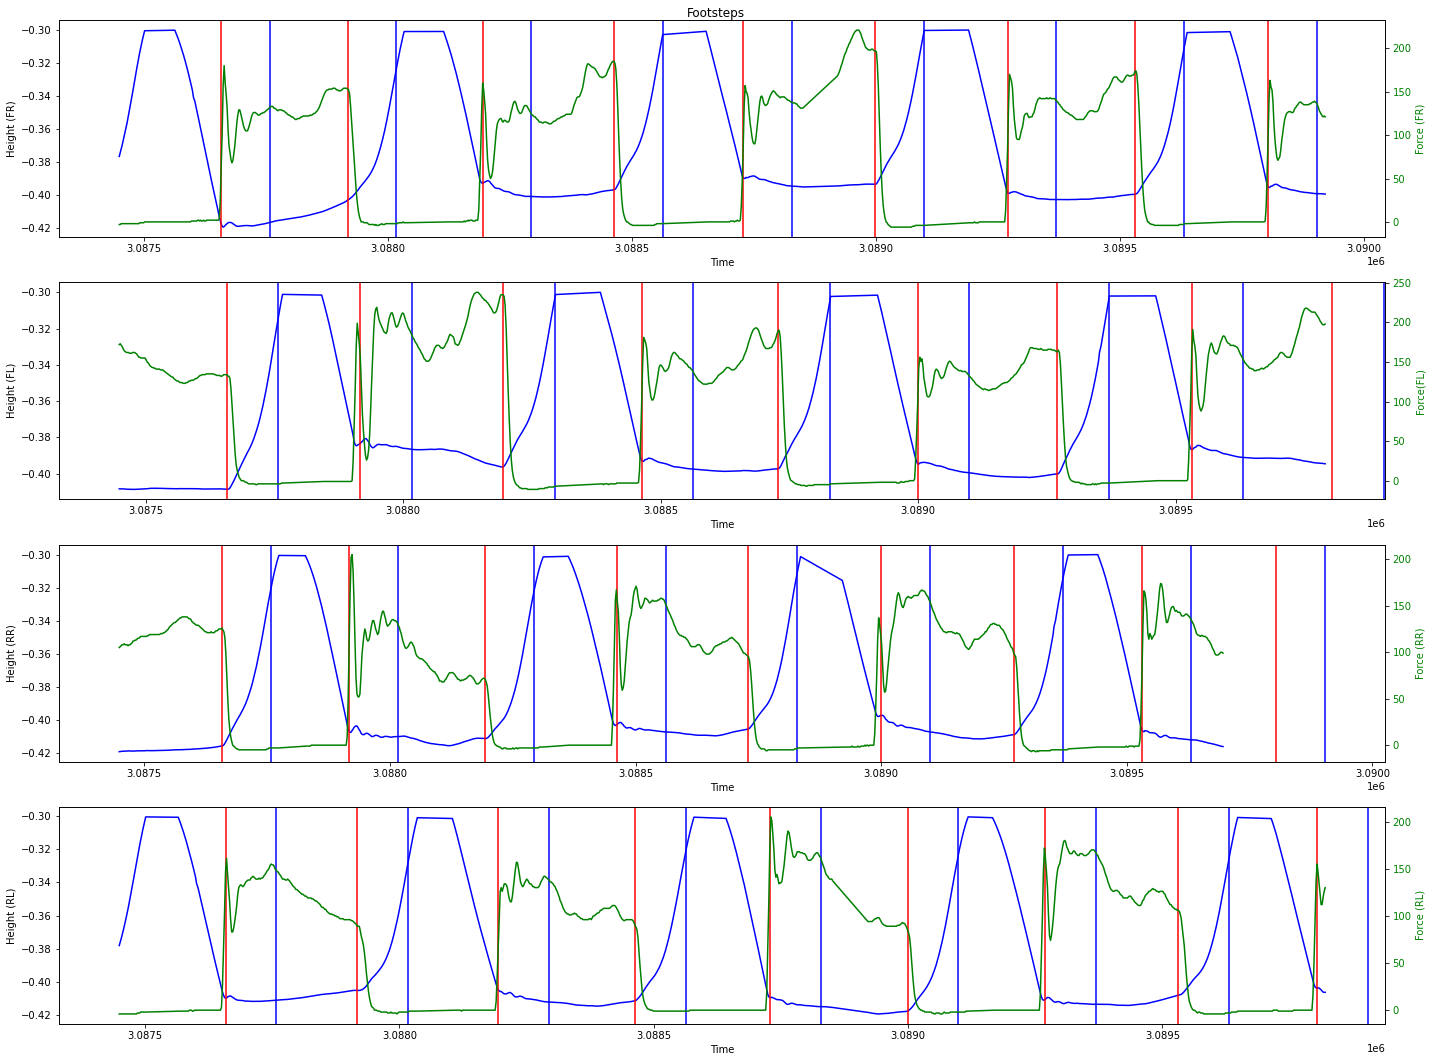

In [19]:
motion_04_fwd, footsteps_04_fwd = footstep_extraction_and_plotting(dataset=motion_04, velocities=[velocity, 0, 0], height_threshold=0.1, force_thresholds=[60,60,60,60], indexes=range(0, 1000))

### Backward motion

Foot swinging motions lenghts:  20531 20066 20200 19965
Min and max diff between front and rear feet 0.003511 0.272447 

Amount of footsteps found with height criteria:  9212 

Intersection with motion commands:  9212 

Intersection with no motion commands:  0 

Number of force footsteps:  620 

Number of height-force footsteps:  620 

Number of footsteps extracted with height-force due to motion:  620 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  620
Footsteps after non-maximum-suppression:  171
3166943.0 3167043.0
3167212.0 3167312.0
3167483.0 3167583.0
3167754.0 3167854.0
3168027.0 3168127.0
3168300.0 3168400.0
3168571.0 3168671.0
3168842.0 3168942.0
3169113.0 3169213.0
3169384.0 3169484.0
3169658.0 3169758.0
3169927.0 3170027.0
3170199.0 3170299.0
3170472.0 3170572.0
3170745.0 3170845.0
3171014.0 3171114.0
3171289.0 3171389.0
3171558.0 3171658.0
3171831.0 3171931.0
3172102.0 3172202.0
3172375.0 3172475.0
3172646.0 3172746.0
3172918.0

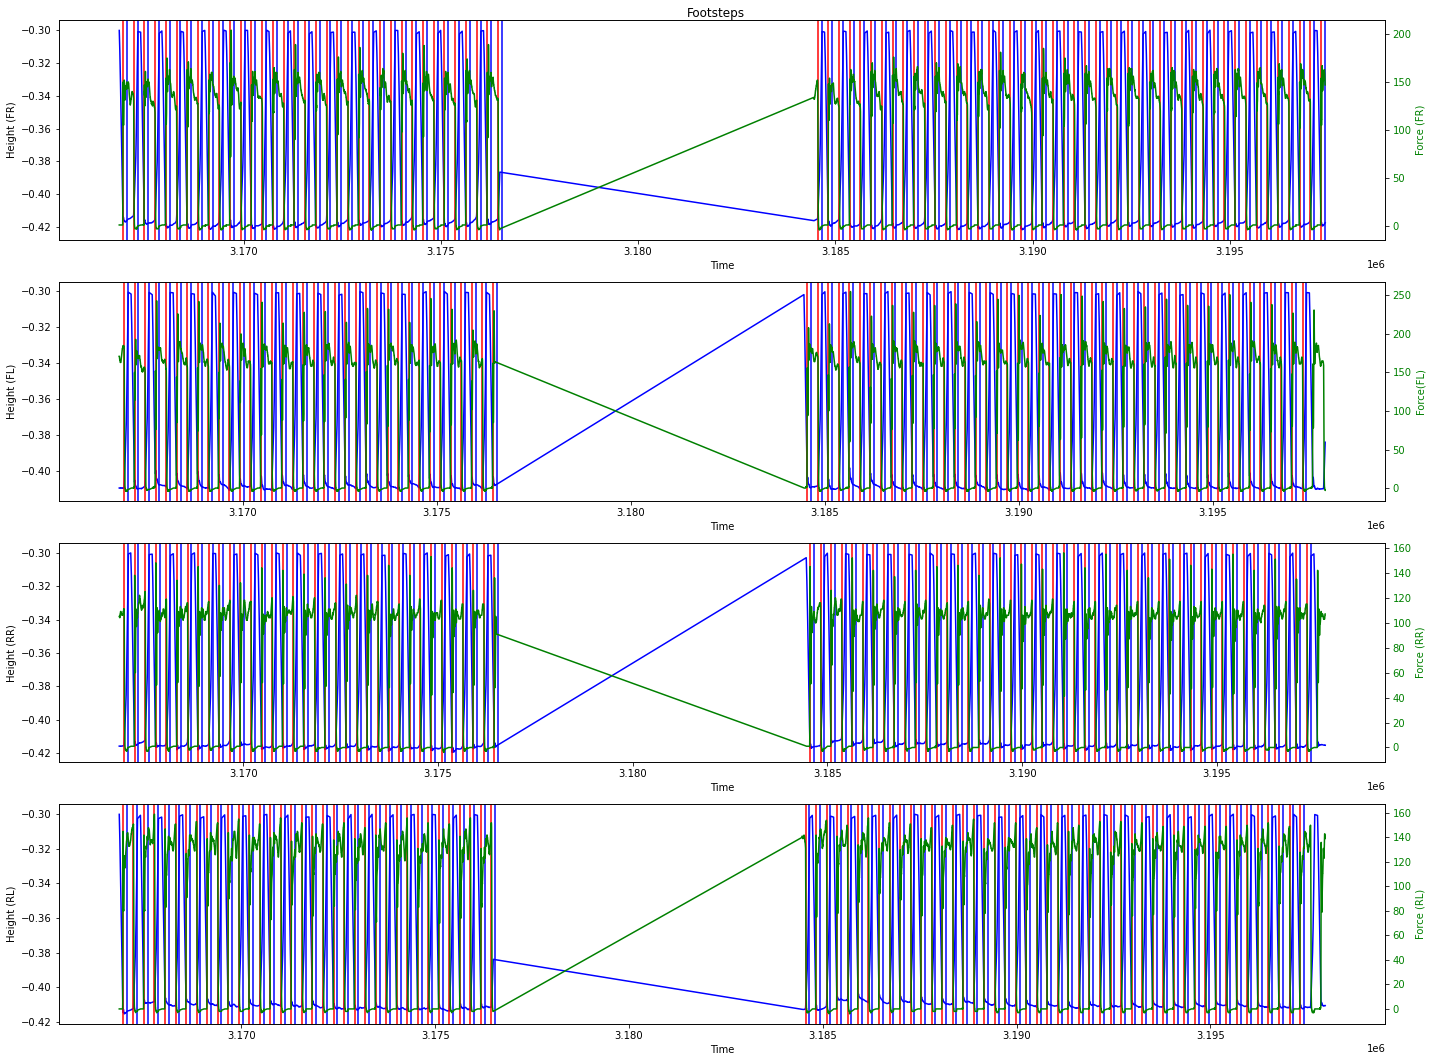

In [20]:
motion_04_bwd, footsteps_04_bwd = footstep_extraction_and_plotting(dataset=motion_04, velocities=[-velocity, 0, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 10000))

### Side motion (right)

Foot swinging motions lenghts:  9492 9262 9678 9599
Min and max diff between front and rear feet 0.003538 0.267029 

Amount of footsteps found with height criteria:  4418 

Intersection with motion commands:  4418 

Intersection with no motion commands:  0 

Number of force footsteps:  302 

Number of height-force footsteps:  302 

Number of footsteps extracted with height-force due to motion:  302 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  302
Footsteps after non-maximum-suppression:  81
3102158.0 3102258.0
3102427.0 3102527.0
3102700.0 3102800.0
3102965.0 3103065.0
3103238.0 3103338.0
3103503.0 3103603.0
3103774.0 3103874.0
3104043.0 3104143.0
3104314.0 3104414.0
3104581.0 3104681.0
3104852.0 3104952.0
3105120.0 3105220.0
3105391.0 3105491.0
3105660.0 3105760.0
3105931.0 3106031.0
3106200.0 3106300.0
3106471.0 3106571.0
3106736.0 3106836.0
3107007.0 3107107.0
3107278.0 3107378.0
3107547.0 3107647.0
3107818.0 3107918.0
3108089.0 3108

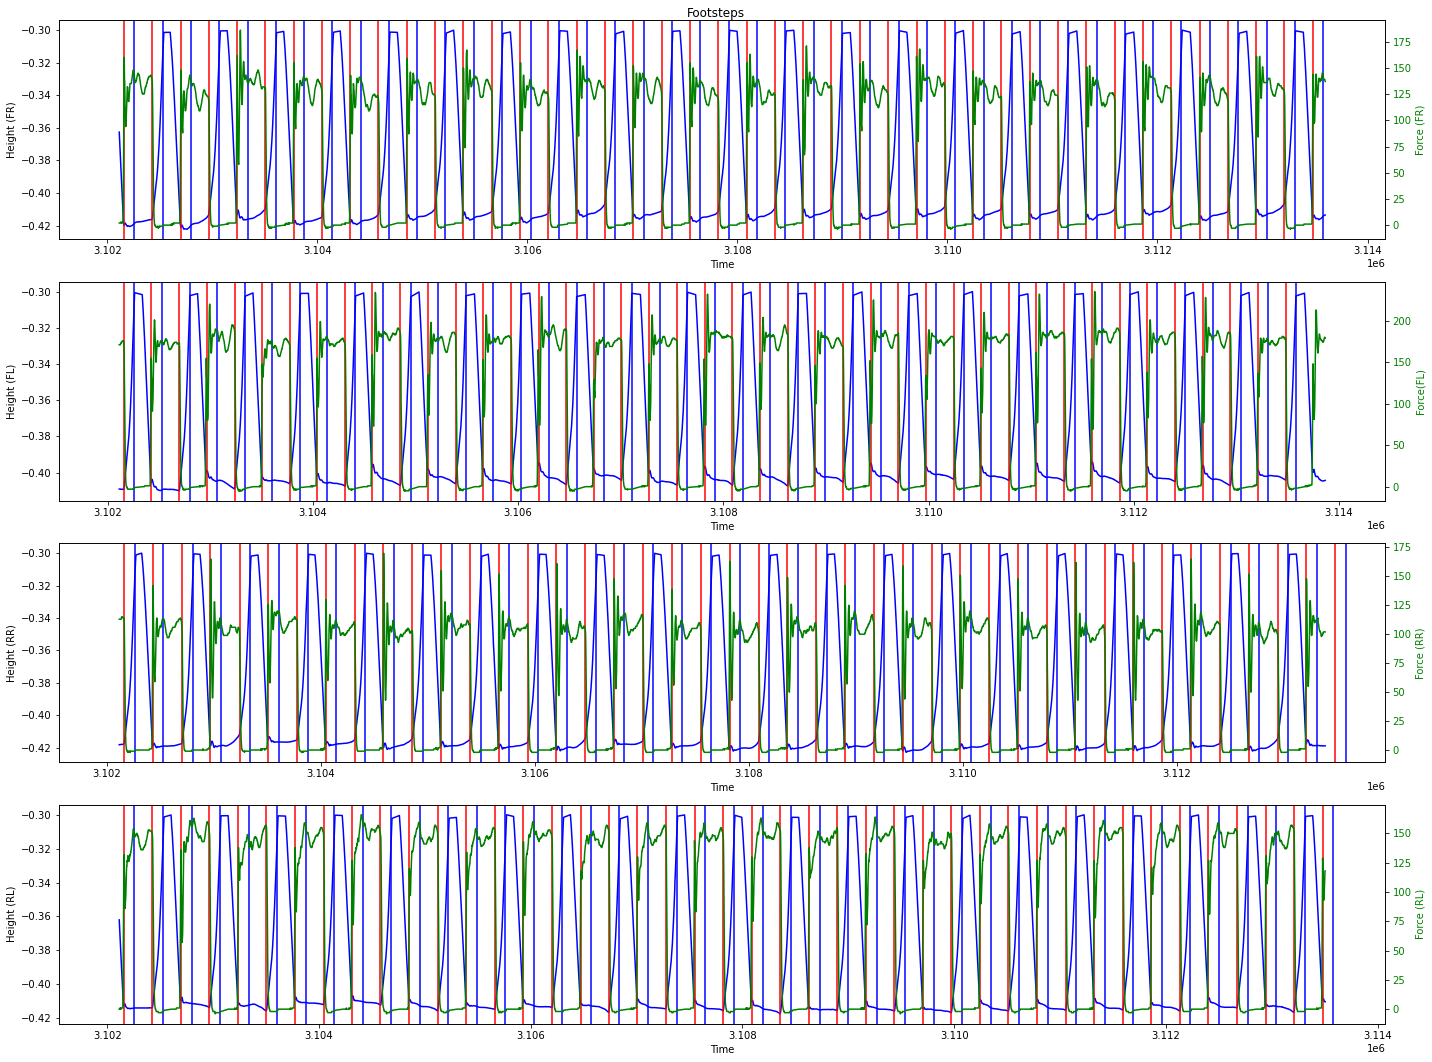

In [21]:
motion_04_side_right, footsteps_04_side_right = footstep_extraction_and_plotting(dataset=motion_04, velocities=[0, velocity, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 5000))

### Side (left)

Foot swinging motions lenghts:  11894 11904 11971 12228
Min and max diff between front and rear feet 0.002183 0.267058 

Amount of footsteps found with height criteria:  5534 

Intersection with motion commands:  5534 

Intersection with no motion commands:  0 

Number of force footsteps:  402 

Number of height-force footsteps:  402 

Number of footsteps extracted with height-force due to motion:  402 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  402
Footsteps after non-maximum-suppression:  102
3117796.0 3117896.0
3118067.0 3118167.0
3118338.0 3118438.0
3118609.0 3118709.0
3118875.0 3118975.0
3119146.0 3119246.0
3119417.0 3119517.0
3119688.0 3119788.0
3119957.0 3120057.0
3120226.0 3120326.0
3120497.0 3120597.0
3120768.0 3120868.0
3121039.0 3121139.0
3121310.0 3121410.0
3121579.0 3121679.0
3121848.0 3121948.0
3122119.0 3122219.0
3122391.0 3122491.0
3122660.0 3122760.0
3122931.0 3123031.0
3123200.0 3123300.0
3123469.0 3123569.0
3123740.0

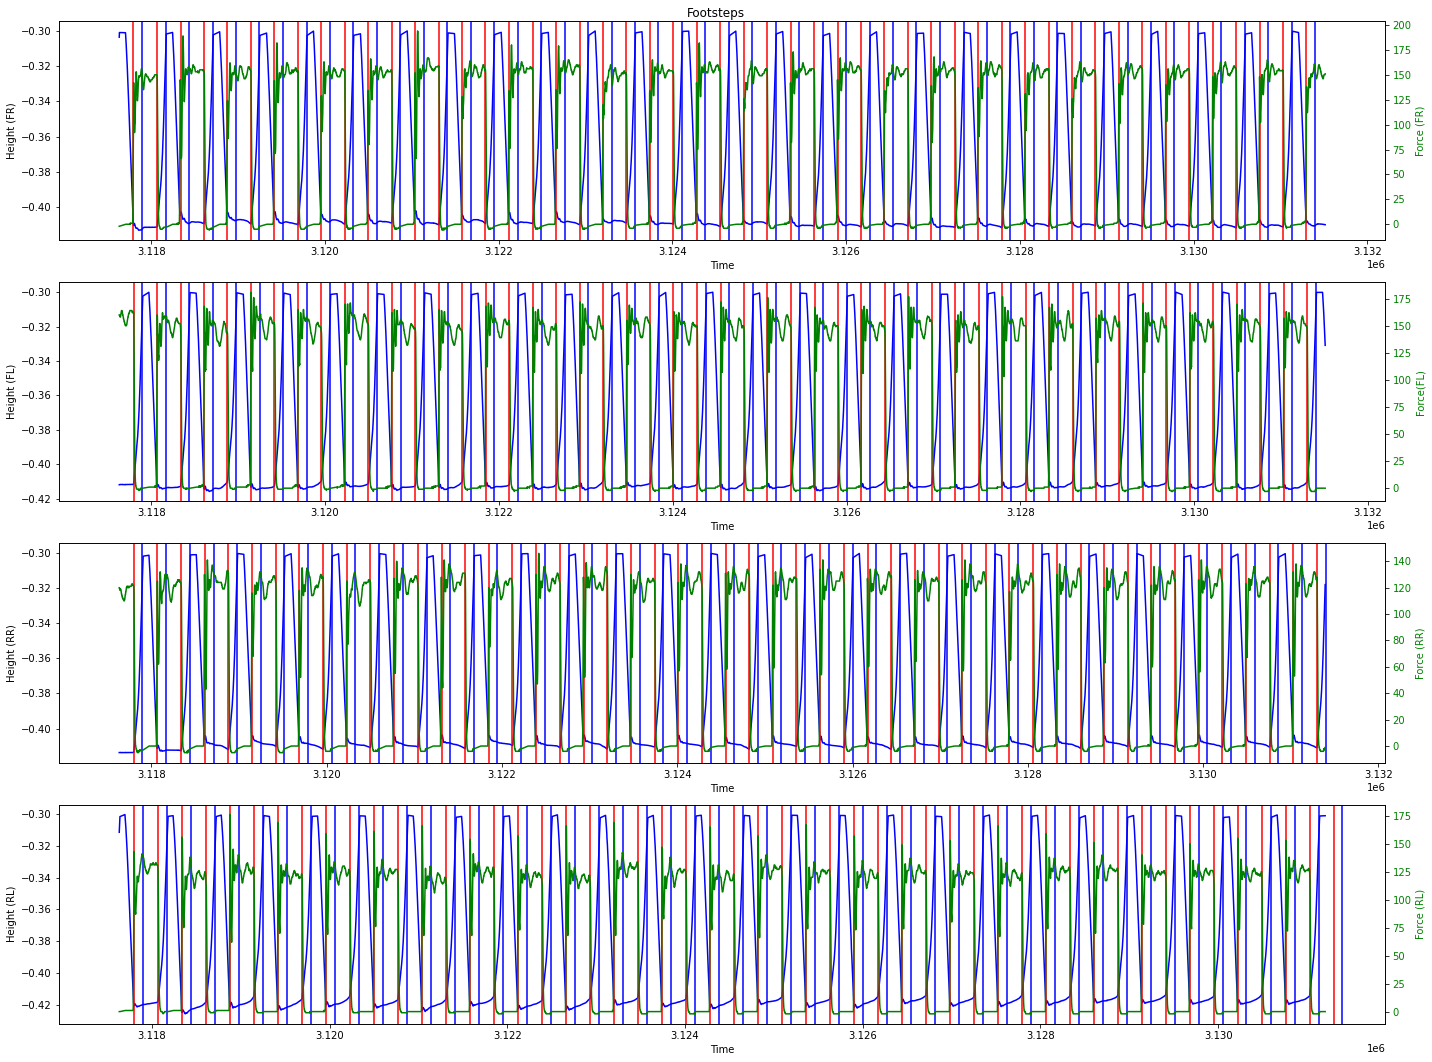

In [22]:
motion_04_side_left, footsteps_04_side_left = footstep_extraction_and_plotting(dataset=motion_04, velocities=[0, -velocity, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 6000))

### Rotation (clockwise)

Foot swinging motions lenghts:  9632 9889 9980 9591
Min and max diff between front and rear feet 0.000565 0.266787 

Amount of footsteps found with height criteria:  4644 

Intersection with motion commands:  4644 

Intersection with no motion commands:  0 

Number of force footsteps:  304 

Number of height-force footsteps:  304 

Number of footsteps extracted with height-force due to motion:  304 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  304
Footsteps after non-maximum-suppression:  85
3146152.0 3146252.0
3146425.0 3146525.0
3146684.0 3146784.0
3146967.0 3147067.0
3147226.0 3147326.0
3147507.0 3147607.0
3147766.0 3147866.0
3148047.0 3148147.0
3148308.0 3148408.0
3148587.0 3148687.0
3148850.0 3148950.0
3149129.0 3149229.0
3149389.0 3149489.0
3149670.0 3149770.0
3149933.0 3150033.0
3150212.0 3150312.0
3150473.0 3150573.0
3150754.0 3150854.0
3151015.0 3151115.0
3151294.0 3151394.0
3151557.0 3151657.0
3151836.0 3151936.0
3152097.0 3152

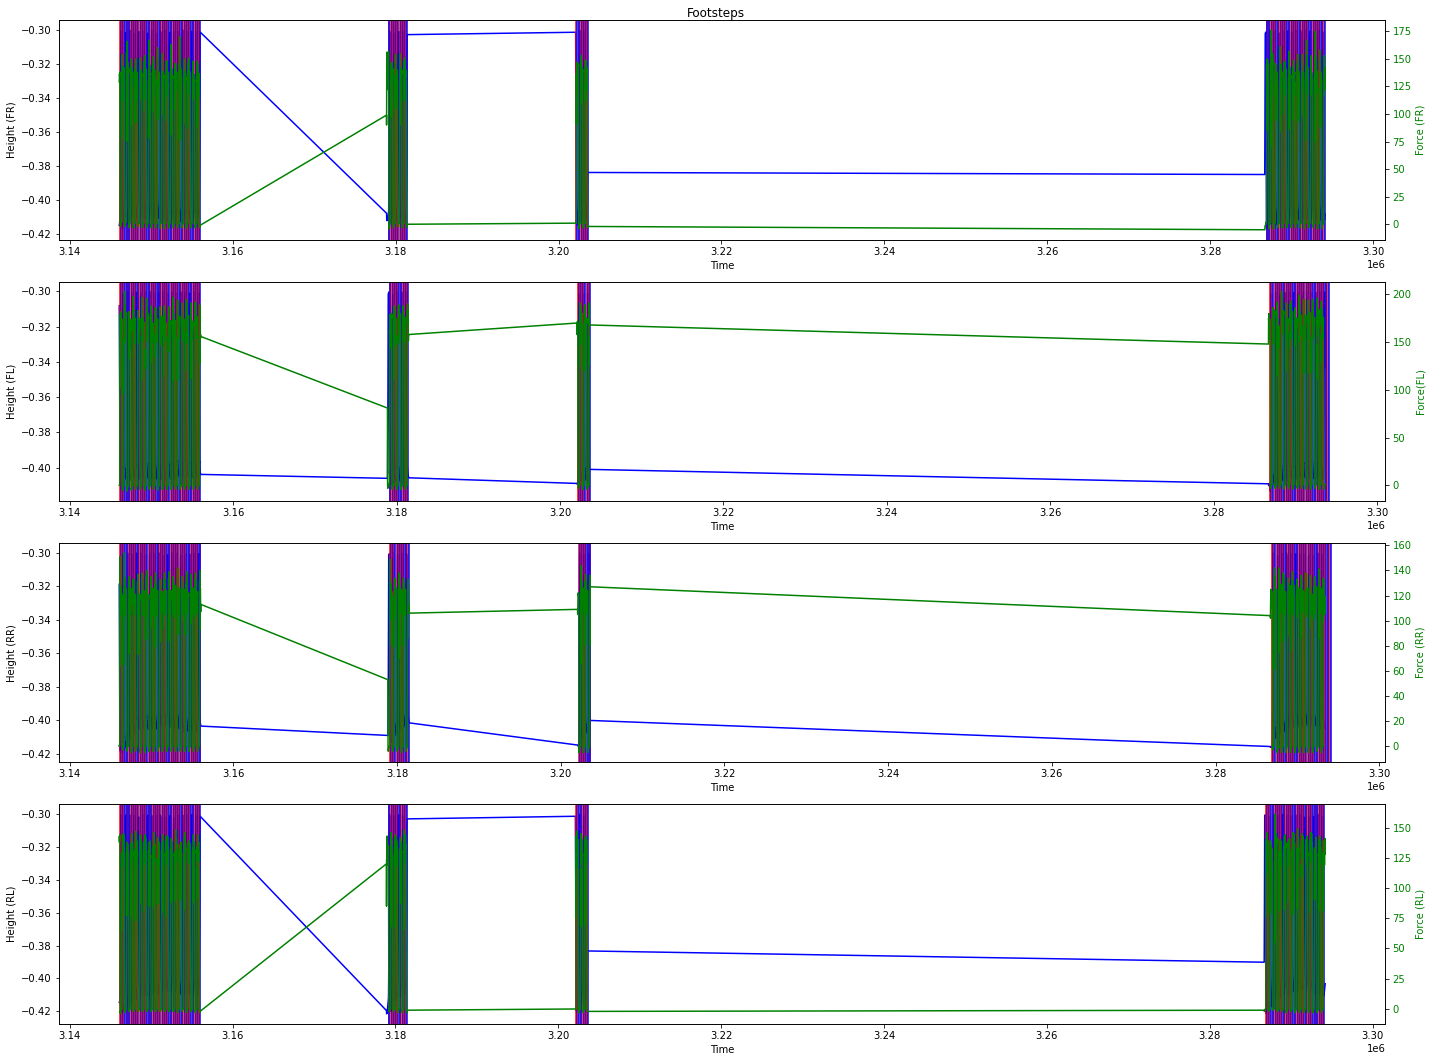

In [23]:
motion_04_clock, footsteps_04_clock = footstep_extraction_and_plotting(dataset=motion_04, velocities=[0, 0, velocity], height_threshold=0.1, force_thresholds=[90,90,90,90], indexes=range(0, 9000))

### Rotation (counter clockwise)

Foot swinging motions lenghts:  7549 7239 7299 7735
Min and max diff between front and rear feet 0.000346 0.269791 

Amount of footsteps found with height criteria:  3461 

Intersection with motion commands:  3461 

Intersection with no motion commands:  0 

Number of force footsteps:  262 

Number of height-force footsteps:  262 

Number of footsteps extracted with height-force due to motion:  262 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  262
Footsteps after non-maximum-suppression:  64
3080371.0 3080471.0
3080634.0 3080734.0
3080911.0 3081011.0
3081176.0 3081276.0
3081453.0 3081553.0
3081716.0 3081816.0
3081993.0 3082093.0
3082256.0 3082356.0
3082533.0 3082633.0
3082798.0 3082898.0
3083073.0 3083173.0
3083336.0 3083436.0
3083614.0 3083714.0
3084154.0 3084254.0
3084415.0 3084515.0
3084694.0 3084794.0
3084957.0 3085057.0
3085234.0 3085334.0
3136427.0 3136527.0
3136690.0 3136790.0
3136967.0 3137067.0
3137230.0 3137330.0
3137507.0 3137

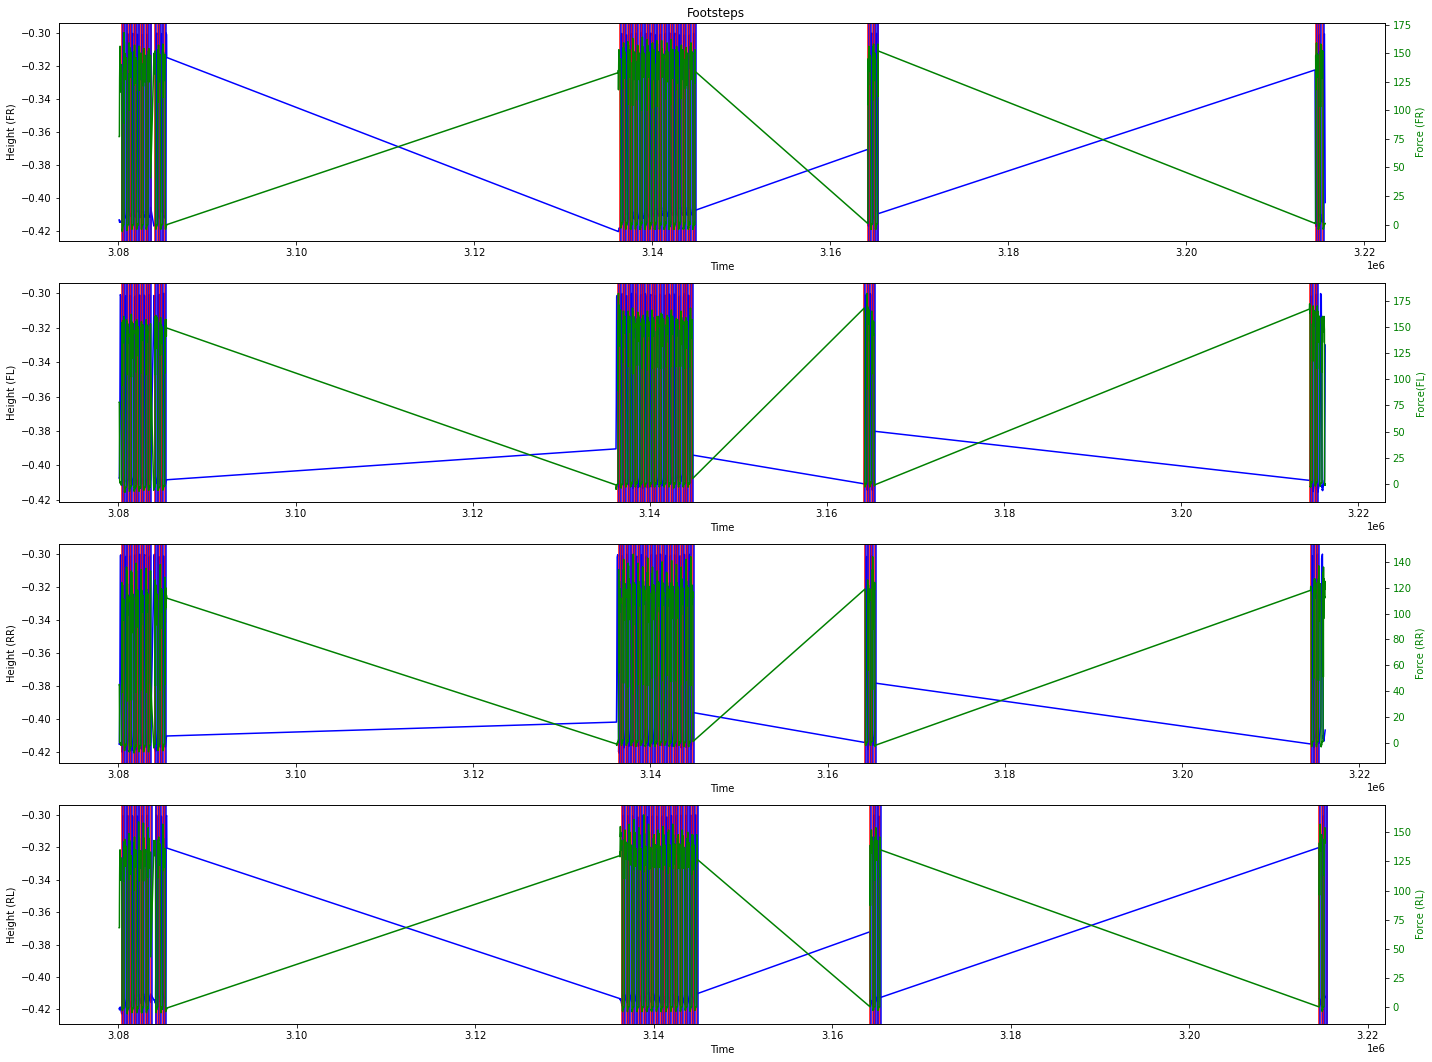

In [24]:
motion_04_count, footsteps_04_count = footstep_extraction_and_plotting(dataset=motion_04, velocities=[0, 0, -velocity], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 7000))

### Step size

In [25]:
def get_step_size(dataset, footsteps, idx_coord=[32,35,38,41]):
    # Footsteps sizes
    step_size_fr = []
    step_size_fl = []
    step_size_rr = []
    step_size_rl = []
    footsteps_period = []
    
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
            if time_diff < 300:
                footsteps_period.append(time_diff)
                step_size_fr.append(dataset[footsteps[idx], idx_coord[0]] - dataset[footsteps[idx-1], idx_coord[0]])
                step_size_fl.append(dataset[footsteps[idx], idx_coord[1]] - dataset[footsteps[idx-1], idx_coord[1]])
                step_size_rr.append(dataset[footsteps[idx], idx_coord[2]] - dataset[footsteps[idx-1], idx_coord[2]])
                step_size_rl.append(dataset[footsteps[idx], idx_coord[3]] - dataset[footsteps[idx-1], idx_coord[3]])
    
    # Convert to numpy array
    step_size_fr_numpy = np.array(step_size_fr)
    step_size_fl_numpy = np.array(step_size_fl)
    step_size_rr_numpy = np.array(step_size_rr)
    step_size_rl_numpy = np.array(step_size_rl)
    footsteps_period_numpy = np.array(footsteps_period)
        
    # Only keep positive footsteps
    step_size_fr_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_fl_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_rr_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_rl_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    
    # Print average step-size
    print("Avg. step size time: ", np.mean(footsteps_period_numpy))
    print("Avg. step size for FR foot: ", np.mean(step_size_fr_numpy))
    print("Avg. step size for FL foot: ", np.mean(step_size_fl_numpy))
    print("Avg. step size for RR foot: ", np.mean(step_size_rr_numpy))
    print("Avg. step size for RL foot: ", np.mean(step_size_rl_numpy), '\n')

    # Print std. dev. step-size
    print("Std. dev. step size for FR foot: ", np.std(step_size_fr_numpy))
    print("Std. dev. step size for FL foot: ", np.std(step_size_fl_numpy))
    print("Std. dev. step size for RR foot: ", np.std(step_size_rr_numpy))
    print("Std. dev. step size for RL foot: ", np.std(step_size_rl_numpy), '\n')
    
    return step_size_fr_numpy, step_size_fl_numpy, step_size_rr_numpy, step_size_rl_numpy

#### Forward motion

In [26]:
# Step size and velocity along x axis 
step_size_fr_x_fwd,_,_,_ = get_step_size(motion_04_fwd, footsteps_04_fwd)

Avg. step size time:  267.7348484848485
Avg. step size for FR foot:  0.15070180000000002
Avg. step size for FL foot:  0.15070180000000002
Avg. step size for RR foot:  0.15070180000000002
Avg. step size for RL foot:  0.15070180000000002 

Std. dev. step size for FR foot:  0.024235584017149404
Std. dev. step size for FL foot:  0.024235584017149404
Std. dev. step size for RR foot:  0.024235584017149404
Std. dev. step size for RL foot:  0.024235584017149404 



In [27]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_04_fwd, footsteps_04_fwd, idx_coord=[33, 36, 39, 42])

Avg. step size time:  267.7348484848485
Avg. step size for FR foot:  0.011853010606060605
Avg. step size for FL foot:  0.011853010606060605
Avg. step size for RR foot:  0.011853010606060605
Avg. step size for RL foot:  0.011853010606060605 

Std. dev. step size for FR foot:  0.01603869011846353
Std. dev. step size for FL foot:  0.01603869011846353
Std. dev. step size for RR foot:  0.01603869011846353
Std. dev. step size for RL foot:  0.01603869011846353 



### Backward motion

In [28]:
# Step size and velocity along x axis 
step_size_fr_x_bwd,_,_,_ = get_step_size(motion_04_bwd, footsteps_04_bwd)

Avg. step size time:  271.5389221556886
Avg. step size for FR foot:  0.061925178571428575
Avg. step size for FL foot:  0.061925178571428575
Avg. step size for RR foot:  0.061925178571428575
Avg. step size for RL foot:  0.061925178571428575 

Std. dev. step size for FR foot:  0.006536041816181581
Std. dev. step size for FL foot:  0.006536041816181581
Std. dev. step size for RR foot:  0.006536041816181581
Std. dev. step size for RL foot:  0.006536041816181581 



In [29]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_04_bwd, footsteps_04_bwd, idx_coord=[33, 36, 39, 42])

Avg. step size time:  271.5389221556886
Avg. step size for FR foot:  0.03145030120481927
Avg. step size for FL foot:  0.03145030120481927
Avg. step size for RR foot:  0.03145030120481927
Avg. step size for RL foot:  0.03145030120481927 

Std. dev. step size for FR foot:  0.009771658028201714
Std. dev. step size for FL foot:  0.009771658028201714
Std. dev. step size for RR foot:  0.009771658028201714
Std. dev. step size for RL foot:  0.009771658028201714 



### Side motion (right)

In [30]:
# Step size and velocity along x axis 
step_size_fr_x_right,_,_,_ = get_step_size(motion_04_side_right, footsteps_04_side_right)

Avg. step size time:  269.5822784810127
Avg. step size for FR foot:  0.0032960952380952395
Avg. step size for FL foot:  0.0032960952380952395
Avg. step size for RR foot:  0.0032960952380952395
Avg. step size for RL foot:  0.0032960952380952395 

Std. dev. step size for FR foot:  0.00196124141698354
Std. dev. step size for FL foot:  0.00196124141698354
Std. dev. step size for RR foot:  0.00196124141698354
Std. dev. step size for RL foot:  0.00196124141698354 



In [31]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_04_side_right, footsteps_04_side_right, idx_coord=[33, 36, 39, 42])

Avg. step size time:  269.5822784810127
Avg. step size for FR foot:  0.0402491282051282
Avg. step size for FL foot:  0.0402491282051282
Avg. step size for RR foot:  0.0402491282051282
Avg. step size for RL foot:  0.0402491282051282 

Std. dev. step size for FR foot:  0.010128900472333374
Std. dev. step size for FL foot:  0.010128900472333374
Std. dev. step size for RR foot:  0.010128900472333374
Std. dev. step size for RL foot:  0.010128900472333374 



### Side motions (left)

In [32]:
# Step size and velocity along x axis 
step_size_fr_x_left,_,_,_ = get_step_size(motion_04_side_left, footsteps_04_side_left)

Avg. step size time:  270.03
Avg. step size for FR foot:  0.015924699999999996
Avg. step size for FL foot:  0.015924699999999996
Avg. step size for RR foot:  0.015924699999999996
Avg. step size for RL foot:  0.015924699999999996 

Std. dev. step size for FR foot:  0.001764988795998433
Std. dev. step size for FL foot:  0.001764988795998433
Std. dev. step size for RR foot:  0.001764988795998433
Std. dev. step size for RL foot:  0.001764988795998433 



In [33]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_04_side_left, footsteps_04_side_left, idx_coord=[33, 36, 39, 42])

Avg. step size time:  270.03
Avg. step size for FR foot:  0.021565160000000007
Avg. step size for FL foot:  0.021565160000000007
Avg. step size for RR foot:  0.021565160000000007
Avg. step size for RL foot:  0.021565160000000007 

Std. dev. step size for FR foot:  0.00736193785455976
Std. dev. step size for FL foot:  0.00736193785455976
Std. dev. step size for RR foot:  0.00736193785455976
Std. dev. step size for RL foot:  0.00736193785455976 



### Rotation (clockwise)

In [34]:
# Step size and velocity along x axis 
step_size_fr_x_clock,_,_,_ = get_step_size(motion_04_clock, footsteps_04_clock)

Avg. step size time:  270.38271604938274
Avg. step size for FR foot:  0.028574475
Avg. step size for FL foot:  0.028574475
Avg. step size for RR foot:  0.028574475
Avg. step size for RL foot:  0.028574475 

Std. dev. step size for FR foot:  0.005359604257720436
Std. dev. step size for FL foot:  0.005359604257720436
Std. dev. step size for RR foot:  0.005359604257720436
Std. dev. step size for RL foot:  0.005359604257720436 



In [35]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_04_clock, footsteps_04_clock, idx_coord=[33, 36, 39, 42])

Avg. step size time:  270.38271604938274
Avg. step size for FR foot:  0.036339525
Avg. step size for FL foot:  0.036339525
Avg. step size for RR foot:  0.036339525
Avg. step size for RL foot:  0.036339525 

Std. dev. step size for FR foot:  0.009124289531211457
Std. dev. step size for FL foot:  0.009124289531211457
Std. dev. step size for RR foot:  0.009124289531211457
Std. dev. step size for RL foot:  0.009124289531211457 



### Rotation (counter clockwise)

In [36]:
# Step size and velocity along x axis 
step_size_fr_x_count,_,_,_ = get_step_size(motion_04_count, footsteps_04_count)

Avg. step size time:  269.91525423728814
Avg. step size for FR foot:  0.015699699999999997
Avg. step size for FL foot:  0.015699699999999997
Avg. step size for RR foot:  0.015699699999999997
Avg. step size for RL foot:  0.015699699999999997 

Std. dev. step size for FR foot:  0.002313105086962827
Std. dev. step size for FL foot:  0.002313105086962827
Std. dev. step size for RR foot:  0.002313105086962827
Std. dev. step size for RL foot:  0.002313105086962827 



In [37]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_04_count, footsteps_04_count, idx_coord=[33, 36, 39, 42])

Avg. step size time:  269.91525423728814
Avg. step size for FR foot:  0.025880873333333335
Avg. step size for FL foot:  0.025880873333333335
Avg. step size for RR foot:  0.025880873333333335
Avg. step size for RL foot:  0.025880873333333335 

Std. dev. step size for FR foot:  0.0038341692496057372
Std. dev. step size for FL foot:  0.0038341692496057372
Std. dev. step size for RR foot:  0.0038341692496057372
Std. dev. step size for RL foot:  0.0038341692496057372 



### Footstep visualization

In [38]:
def visualize_static_foosteps(dataset, footsteps):
    old_xs = None
    old_ys = None
    old_zs = None
    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)
        
        time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
        #if time_diff < 300:
        # 3D positions
        xs = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
        ys = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
        zs = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])    

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()

        #print(xs, ys, zs, dataset[footstep, 2:5], dataset[footstep, 25:28])
        if idx > 0 and idx < len(footsteps):
            print(f'Diff: {time_diff}. Command: {dataset[footstep, 2:5]}. State: {dataset[footstep, 25:28]}. Coord: {[xs[0], ys[0], zs[0]]}. Step size: {[xs[0]-old_xs[0], ys[0]-old_ys[0], zs[0]-old_zs[0]]}.')
        else:
            print(f'Command: {dataset[footstep, 2:5]}. State: {dataset[footstep, 25:28]}. Coord: {[xs[0], ys[0], zs[0]]}.')
            
        old_xs = xs
        old_ys = ys
        old_zs = zs

In [39]:
def update_points(num, dataset, footsteps, x, y, z, points):    
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, footsteps, x, y, z, points))
    
    return anim   

In [40]:
def update_prediction_points(dataset, num, x, y, z, points):  
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_predicted_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, x, y, z, points))
    
    return anim   

In [41]:
np.where(np.isclose(motion_04_cmds[:, 0], 3087917 + 100))[0]

NameError: name 'motion_04_cmds' is not defined

In [ ]:
np.where(motion_04_cmds[:, 0] == 3087917 + 100)[0]

In [ ]:
motion_04_cmds[footsteps_04_fwd, 0]

In [ ]:
def visualize_absolute_foostep_sizes(dataset, footsteps):    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)
                    
        # 3D positions
        xs = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
        ys = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
        zs = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])    

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()
        
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
        
            print("Time diff: ", time_diff)

            if time_diff < 300:
                
                # Find closest timestamp with gap of 100 (to know which foot is moving)
                absolute_val_array = np.abs(dataset[:, 0] - (dataset[footstep, 0] + 100))
                idx_height_check = absolute_val_array.argmin()
                
                fr_moving = np.abs(dataset[footstep, 34] - dataset[idx_height_check, 34])
                fl_moving = np.abs(dataset[footstep, 37] - dataset[idx_height_check, 37])
                rr_moving = np.abs(dataset[footstep, 40] - dataset[idx_height_check, 40])
                rl_moving = np.abs(dataset[footstep, 43] - dataset[idx_height_check, 43])
                
                print("Footstep timestamp: ", dataset[footstep, 0])
                print("Height check index: ", idx_height_check)
                print("Height check timestamp: ", dataset[idx_height_check, 0])

                print(f'\nFL moving: {fl_moving}. FR moving: {fr_moving}')
                print(f'RL moving: {rl_moving}. RR moving: {rr_moving}')

                print(f'\nFL moving: {fl_moving > 0.06}. FR moving: {fr_moving > 0.06}')
                print(f'RL moving: {rl_moving > 0.06}. RR moving: {rr_moving > 0.06}')
                
                print(f'\nFR before: {dataset[footstep, 34]}. FR later: {dataset[idx_height_check, 34]}')
                print(f'RR moving: {dataset[footstep, 37]}. RL moving: {dataset[idx_height_check, 37]}')

                assert (fr_moving > 0.06) == (rl_moving > 0.06)
                assert (rr_moving > 0.06) == (fl_moving > 0.06)
                assert (fr_moving > 0.06) != (fl_moving > 0.06)
                
                # Compute front feet movements
                fr_movement = abs(abs(dataset[footstep, 32]) - abs(dataset[footsteps[idx+1], 32]))
                fl_movement = abs(abs(dataset[footstep, 35]) - abs(dataset[footsteps[idx+1], 35]))
                rr_movement = abs(abs(dataset[footstep, 38]) - abs(dataset[footsteps[idx+1], 38]))
                rl_movement = abs(abs(dataset[footstep, 41]) - abs(dataset[footsteps[idx+1], 41]))
                
                print(f'\nCoord FR: {[xs[0], ys[0], zs[0]]}. Coord FL: {[xs[1], ys[1], zs[1]]}. Coord RR: {[xs[2], ys[2], zs[2]]}. Coord RL: {[xs[3], ys[3], zs[3]]}')
                
                if fr_moving:
                    print(f'\nFR step_size: {fr_movement + fl_movement}. FL step_size: {0}. RR step size: {0}. RL step_size: {rl_movement + rr_movement}.')
                elif fl_moving:
                    print(f'\nFR step_size: {0}. FL step_size: {fl_movement + fr_movement}. RR step size: {rl_movement + rr_movement}. RL step_size: {0}.')
                else:
                    print("\nERROR")

visualize_absolute_foostep_sizes(motion_04_fwd, footsteps_04_fwd)

### Forward motion

In [ ]:
step_size_fr_x_fwd

In [ ]:
visualize_static_foosteps(motion_04_fwd, footsteps_04_fwd)

In [ ]:
anim = visualize_animated_footsteps(motion_04_fwd, footsteps_04_fwd, "bo")
HTML(anim.to_html5_video())

### Backward motion

In [ ]:
anim = visualize_animated_footsteps(motion_04_bwd, footsteps_04_bwd, "bo")
HTML(anim.to_html5_video())

### Side motion (right)

In [ ]:
anim = visualize_animated_footsteps(motion_04_side_right, footsteps_04_side_right, "bo")
HTML(anim.to_html5_video())

### Side motion (left)

In [ ]:
anim = visualize_animated_footsteps(motion_04_side_left, footsteps_04_side_left, "bo")
HTML(anim.to_html5_video())

### Rotation (clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion_04_clock, footsteps_04_clock, "bo")
HTML(anim.to_html5_video())

### Rotation (counter clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion_04_count, footsteps_04_count, "bo")
HTML(anim.to_html5_video())

# Multivariate Linear Regression (FR foot prediction)

The input will use initially only:

- **HighCmd: fwd, side, rot speeds**
- **HighState: fwd, side, rot speeds, footPosition2Body (FR)**

and as output we seek to predict the following:

- **footPosition2Body (FR)**

In [42]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
def plot_target_and_predictions(title: str, predictions, target):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(range(predictions.shape[0]), predictions, 'b-')
    ax1.set_ylabel('Predictions')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(range(predictions.shape[0]), target, 'g-')
    ax2.set_ylabel('Target', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

In [44]:
def create_timestamp_consistent_dataset(dataset, footsteps):
    # Footsteps sizes
    inputs = []
    labels = []
        
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
            if time_diff < 300:
                inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + dataset[footsteps[idx-1], 32:44].tolist())
                labels.append(dataset[footsteps[idx], 32:44])
            else:
                continue
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy

X_motion_04_fwd_3D, Y_motion_04_fwd_3D = create_timestamp_consistent_dataset(motion_04_fwd, footsteps_04_fwd)
X_motion_04_bwd_3D, Y_motion_04_bwd_3D = create_timestamp_consistent_dataset(motion_04_bwd, footsteps_04_bwd)
X_motion_04_clock_3D, Y_motion_04_clock_3D = create_timestamp_consistent_dataset(motion_04_clock, footsteps_04_clock)
X_motion_04_count_3D, Y_motion_04_count_3D = create_timestamp_consistent_dataset(motion_04_count, footsteps_04_count)
X_motion_04_side_left_3D, Y_motion_04_side_left_3D = create_timestamp_consistent_dataset(motion_04_side_left, footsteps_04_side_left)
X_motion_04_side_right_3D, Y_motion_04_side_right_3D = create_timestamp_consistent_dataset(motion_04_side_right, footsteps_04_side_right)

# Stack datasets
X_motion_04_3D = np.concatenate((X_motion_04_fwd_3D, X_motion_04_bwd_3D, X_motion_04_side_right_3D, X_motion_04_side_left_3D, X_motion_04_clock_3D, X_motion_04_count_3D))
Y_motion_04_3D = np.concatenate((Y_motion_04_fwd_3D, Y_motion_04_bwd_3D, Y_motion_04_side_right_3D, Y_motion_04_side_left_3D, Y_motion_04_clock_3D, Y_motion_04_count_3D))

In [48]:
%store X_motion_04_3D
%store Y_motion_04_3D

Stored 'X_motion_04_3D' (ndarray)
Stored 'Y_motion_04_3D' (ndarray)


In [45]:
def create_timestamp_consistent_dataset_with_step_size_labels(dataset, footsteps, threshold=0.04):
    # Footsteps sizes
    inputs = []
    labels = []
            
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
            
            if time_diff < 300:
                # Input (command, state, x/y/z position for each foot)
                #inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + dataset[footsteps[idx-1], 32:44].tolist())
                
                # Find closest timestamp with gap of 100 (to know which foot is moving)
                absolute_val_array = np.abs(dataset[:, 0] - (dataset[footstep, 0] + 100))
                idx_height_check = absolute_val_array.argmin()
                
                fr_moving = np.abs(dataset[footstep, 34] - dataset[idx_height_check, 34]) > threshold
                fl_moving = np.abs(dataset[footstep, 37] - dataset[idx_height_check, 37]) > threshold
                rr_moving = np.abs(dataset[footstep, 40] - dataset[idx_height_check, 40]) > threshold
                rl_moving = np.abs(dataset[footstep, 43] - dataset[idx_height_check, 43]) > threshold

                assert fr_moving == rl_moving
                assert rr_moving == fl_moving
                assert fr_moving != fl_moving
                
                # Compute FR movement
                fr_movement_x = abs(abs(dataset[footstep, 32]) - abs(dataset[footsteps[idx+1], 32]))
                fr_movement_y = abs(abs(dataset[footstep, 33]) - abs(dataset[footsteps[idx+1], 33]))
                
                # Compute FL movement
                fl_movement_x = abs(abs(dataset[footstep, 35]) - abs(dataset[footsteps[idx+1], 35]))
                fl_movement_y = abs(abs(dataset[footstep, 36]) - abs(dataset[footsteps[idx+1], 36]))
                
                # Compute RR movement
                rr_movement_x = abs(abs(dataset[footstep, 38]) - abs(dataset[footsteps[idx+1], 38]))
                rr_movement_y = abs(abs(dataset[footstep, 39]) - abs(dataset[footsteps[idx+1], 39]))
                
                # Compute RL movement
                rl_movement_x = abs(abs(dataset[footstep, 41]) - abs(dataset[footsteps[idx+1], 41]))
                rl_movement_y = abs(abs(dataset[footstep, 42]) - abs(dataset[footsteps[idx+1], 42]))
                
                label = []
                                
                if fr_moving:
                    label.append([fr_movement_x + fl_movement_x, fr_movement_y + fl_movement_y, 0, 0, 0, 0, rr_movement_x + rl_movement_x, rr_movement_y + rl_movement_y])
                elif fl_moving:
                    label.append([0, 0, fr_movement_x + fl_movement_x, fr_movement_y + fl_movement_y, rr_movement_x + rl_movement_x, rr_movement_y + rl_movement_y, 0, 0])
                else:
                    print("\nERROR")
                    
                labels.append(label)
                inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + [int(fr_moving), int(fl_moving), int(rr_moving), int(rl_moving)])
                
            else:
                continue
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy.reshape(labels_numpy.shape[0], labels_numpy.shape[2])

X_motion_04_fwd_step, Y_motion_04_fwd_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_04_fwd, footsteps_04_fwd)
X_motion_04_bwd_step, Y_motion_04_bwd_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_04_bwd, footsteps_04_bwd)
X_motion_04_clock_step, Y_motion_04_clock_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_04_clock, footsteps_04_clock)
X_motion_04_count_step, Y_motion_04_count_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_04_count, footsteps_04_count)
X_motion_04_side_left_step, Y_motion_04_side_left_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_04_side_left, footsteps_04_side_left)
X_motion_04_side_right_step, Y_motion_04_side_right_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_04_side_right, footsteps_04_side_right)

# Stack datasets
X_motion_04_step = np.concatenate((X_motion_04_fwd_step, X_motion_04_bwd_step, X_motion_04_side_right_step, X_motion_04_side_left_step, X_motion_04_clock_step, X_motion_04_count_step))
Y_motion_04_step = np.concatenate((Y_motion_04_fwd_step, Y_motion_04_bwd_step, Y_motion_04_side_right_step, Y_motion_04_side_left_step, Y_motion_04_clock_step, Y_motion_04_count_step))

In [46]:
%store X_motion_04_step
%store Y_motion_04_step

Stored 'X_motion_04_step' (ndarray)
Stored 'Y_motion_04_step' (ndarray)


In [47]:
def labels_stats(dataset, title):
    print(f'Statistics for {title} motion\n')
    
    # Find all positive movements in x and y for FR
    fr_steps_x = np.where(dataset[:, 0] > 0)[0]
    fr_steps_y = np.where(dataset[:, 1] > 0)[0]
    
    # Find all positive movements in x and y for FR
    fl_steps_x = np.where(dataset[:, 2] > 0)[0]
    fl_steps_y = np.where(dataset[:, 3] > 0)[0]
    
    # Find all positive movements in x and y for FR
    rr_steps_x = np.where(dataset[:, 4] > 0)[0]
    rr_steps_y = np.where(dataset[:, 5] > 0)[0]
    
    # Find all positive movements in x and y for FR
    rl_steps_x = np.where(dataset[:, 6] > 0)[0]
    rl_steps_y = np.where(dataset[:, 7] > 0)[0]
    
    # Compute stats for FR foot
    print(f'FR mean x step: {np.mean(dataset[fr_steps_x, 0])}. FR std x step: {np.std(dataset[fr_steps_x, 0])}. FR mean y step: {np.mean(dataset[fr_steps_y, 1])}. FR std y step: {np.mean(dataset[fr_steps_y, 1])}')
 
    # Compute stats for FL foot
    print(f'FL mean x step: {np.mean(dataset[fl_steps_x, 2])}. FL std x step: {np.std(dataset[fl_steps_x, 2])}. FL mean y step: {np.mean(dataset[fl_steps_y, 3])}. FL std y step: {np.mean(dataset[fl_steps_y, 3])}')
    
    # Compute stats for RR foot
    print(f'RR mean x step: {np.mean(dataset[rr_steps_x, 4])}. RR std x step: {np.std(dataset[rr_steps_x, 4])}. RR mean y step: {np.mean(dataset[rr_steps_y, 5])}. RR std y step: {np.mean(dataset[rr_steps_y, 5])}')
    
    # Compute stats for RL foot
    print(f'RL mean x step: {np.mean(dataset[rl_steps_x, 6])}. RL std x step: {np.std(dataset[rl_steps_x, 6])}. RL mean y step: {np.mean(dataset[rl_steps_y, 7])}. RL std y step: {np.mean(dataset[rl_steps_y, 7])}\n')
    
labels_stats(Y_motion_04_fwd_step, "forward")
labels_stats(Y_motion_04_bwd_step, "backward")
labels_stats(Y_motion_04_clock_step, "clockwise")
labels_stats(Y_motion_04_count_step, "counter clockwise")
labels_stats(Y_motion_04_side_left_step, "left step")
labels_stats(Y_motion_04_side_right_step, "right step")

Statistics for forward motion

FR mean x step: 0.2905186417910448. FR std x step: 0.05631564922658696. FR mean y step: 0.02486541791044776. FR std y step: 0.02486541791044776
FL mean x step: 0.2960886461538461. FL std x step: 0.040067162320833544. FL mean y step: 0.0208703076923077. FL std y step: 0.0208703076923077
RR mean x step: 0.30037221538461534. RR std x step: 0.03662543139551336. RR mean y step: 0.021560843076923075. RR std y step: 0.021560843076923075
RL mean x step: 0.2947729402985075. RL std x step: 0.05548361574963506. RL mean y step: 0.02385395223880597. RL std y step: 0.02385395223880597

Statistics for backward motion

FR mean x step: 0.11465630120481932. FR std x step: 0.012895280950362952. FR mean y step: 0.052864843373493973. FR std y step: 0.052864843373493973
FL mean x step: 0.11280334523809522. FL std x step: 0.014242227289108272. FL mean y step: 0.05266946428571428. FL std y step: 0.05266946428571428
RR mean x step: 0.11905846428571427. RR std x step: 0.0147060759